In [30]:
# ETAPA 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Carregando o dataset

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
# ETAPA 2
print(f'Tamanho do conjunto de treino:{x_train.shape}')
print(f'Tamanho do conjunto de teste:{x_test.shape}')
print(f'Formato de uma imagem:{x_train[0].shape}')

Tamanho do conjunto de treino:(60000, 28, 28)
Tamanho do conjunto de teste:(10000, 28, 28)
Formato de uma imagem:(28, 28)


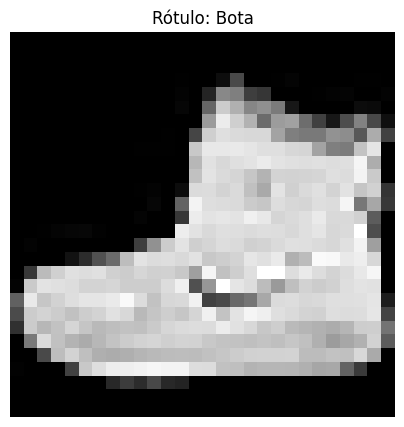

In [32]:
# exibindo uma imagem de exemplo
classes_nomes=['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.figure(figsize=(5,5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Rótulo: {classes_nomes[y_train[0]]}")
plt.axis('off')
plt.show()

In [33]:
# Normalização os dados (escala de 0-255 -> 0-1)
x_train=x_train / 255.0
x_test=x_test / 255.0


In [34]:
# ETAPA 4 - DEFININDO O MODELO
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Aluno Manhã\Documents\Nova pasta\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


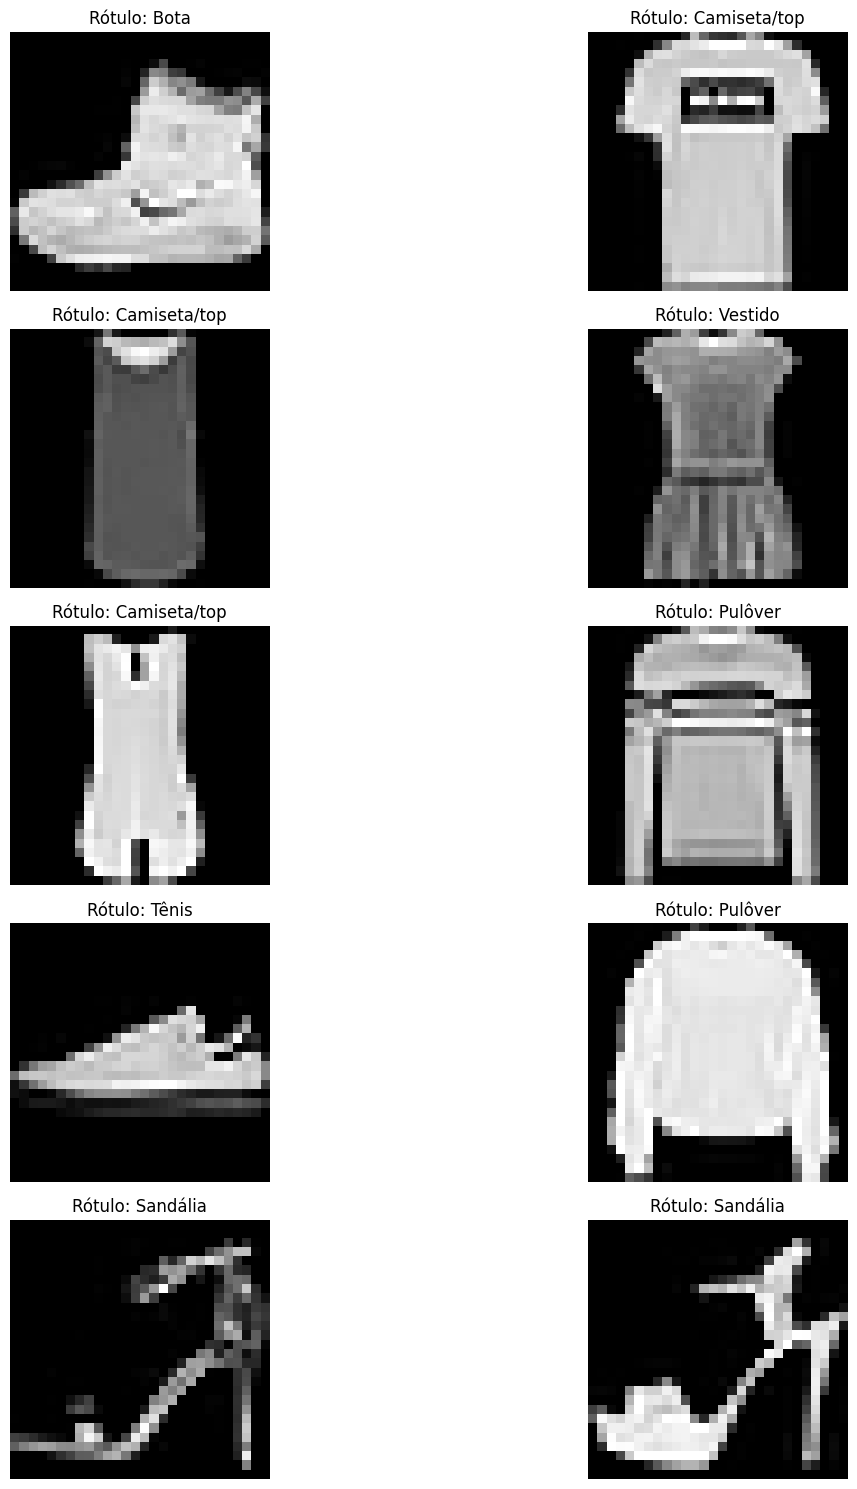

In [35]:
classes_nomes = ['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Número de imagens que você quer mostrar
num_imagens = 10

plt.figure(figsize=(15, 15))
for i in range(num_imagens):
    plt.subplot(5, 2, i+1)  # 5 linhas, 2 colunas
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Rótulo: {classes_nomes[y_train[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()